In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [75]:
df=pd.read_csv(r'C:\Users\Anastasia\Desktop\ocular drugs\Data\descriptors_120raws.csv')
df

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,logPerm
0,376.204988,376.468,4.0,2.0,1.0,2.0,4.0,27.0,56.0,5.0,...,9.972554,8.703150,8.703150,7.183176,-1.33,19.006790,5.383489,1.997481,3.789735,5.135798
1,244.089958,244.265,2.0,1.0,3.0,1.0,1.0,18.0,31.0,3.0,...,5.670131,2.948361,2.948361,1.795098,-2.16,12.300954,5.001423,2.399040,3.417904,5.347108
2,243.105942,243.281,2.0,2.0,3.0,1.0,1.0,18.0,32.0,3.0,...,5.735200,3.004712,3.004712,1.816787,-2.16,12.300954,5.001423,2.399040,3.417904,5.393628
3,92.047344,92.094,3.0,3.0,2.0,3.0,3.0,6.0,14.0,3.0,...,1.707151,0.421498,0.421498,0.057735,-0.12,5.880000,3.084918,2.137732,3.023220,3.806662
4,362.209324,362.466,5.0,3.0,2.0,3.0,5.0,26.0,56.0,5.0,...,9.957047,8.653267,8.653267,7.281020,-1.04,18.329215,5.727623,2.138229,4.037801,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,255.089543,255.273,4.0,1.0,3.0,1.0,3.0,19.0,32.0,4.0,...,6.202262,3.579548,3.579548,2.628901,-2.36,11.714803,4.387760,1.851818,2.705355,1.249902
116,420.221306,420.528,4.0,1.0,4.0,1.0,3.0,31.0,60.0,5.0,...,11.114456,7.749433,7.749433,5.796964,-2.71,21.519337,8.434242,3.742717,5.854816,1.406097
117,324.183778,324.424,4.0,1.0,4.0,1.0,4.0,24.0,48.0,4.0,...,8.682990,5.819484,5.819484,4.444306,-1.91,15.608011,6.187608,2.502406,4.024010,2.161022
118,253.018894,253.718,5.0,2.0,1.0,2.0,6.0,16.0,24.0,7.0,...,4.805416,2.294635,2.294635,1.545781,-1.40,9.799739,3.876645,1.595333,2.374382,3.850998


In [78]:
#create test dataset by choosing of 30 molecules and delete features with low importance
df2 = df.loc[[16, 54, 87, 119, 15, 25, 30, 76, 88, 110, 0, 27, 72, 91, 73, 8, 23, 105, 92, 37, 51, 36, 13, 115, 104, 82, 5, 85, 66, 7]]
#df3 = df2.iloc [:, [3,5,16,26,38, 43]]

In [4]:
df3.to_csv('corneal_test.csv', index=False)

In [79]:
#create train dataset and delete features with low importance
df4 = df.drop (index=[16, 54, 87, 119, 15, 25, 30, 76, 88, 110, 0, 27, 72, 91, 73, 8, 23, 105, 92, 37, 51, 36, 13, 115, 104, 82, 5, 85, 66, 7])
#df4 = df4.iloc [:, [3,5,16,26,38, 43]]

In [6]:
df4.to_csv('corneal_train.csv', index=False)

In [84]:
X_test = df2[df2.columns[:-1]]
y_test = df2[df2.columns[-1]]
X_train = df4[df4.columns[:-1]]
y_train = df4[df4.columns[-1]]

In [8]:
reg = GradientBoostingRegressor(random_state=50)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=50)

In [9]:
r2_score(y_test, reg.predict(X_test))

0.7450650563930239

In [10]:
reg.score(X_test, y_test)

0.7450650563930239

In [85]:
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [92]:
regr = MLPRegressor(solver='lbfgs', alpha=1, hidden_layer_sizes=(10,), random_state=7, activation='logistic')
regr.fit(X_train, y_train)

c:\Users\Anastasia\miniconda3\envs\drops\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='logistic', alpha=1, hidden_layer_sizes=(10,),
             random_state=7, solver='lbfgs')

In [93]:
regr.score(X_test, y_test)

0.4557325780901441

In [68]:
regr.score(X_train, y_train)

0.5089262029708954

ValueError: x and y must be the same size

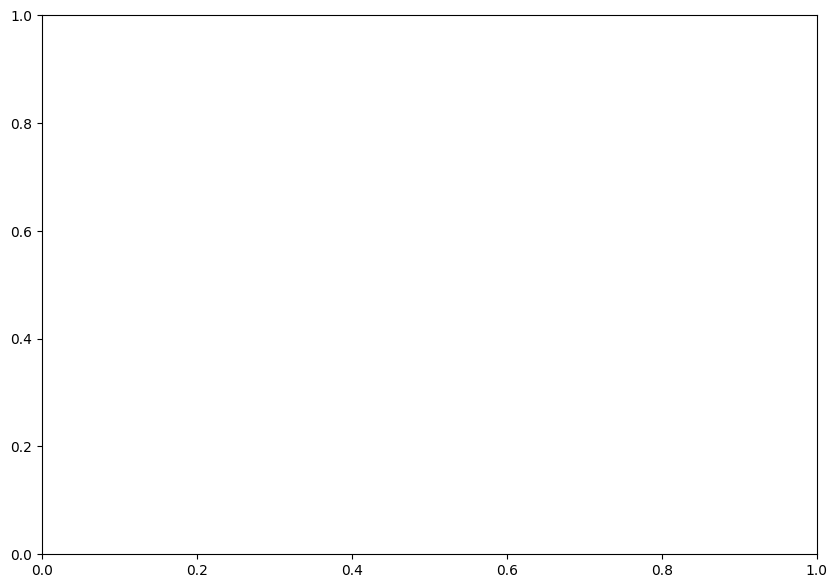

In [74]:
fig = plt.figure(figsize=(10, 7))

legend = ['Train', 'Test']

plt.scatter(y_train, regr.predict, c = 'lightblue', s = 20)
plt.scatter(y_test, regr.predict, c = 'darkblue', s = 20)
plt.legend(legend, loc = 'best')
plt.xlabel("Y True")
plt.ylabel("Y Predicted");

In [19]:
reg = GradientBoostingRegressor(random_state=50, learning_rate=0.1, loss='squared_error', max_depth=3, n_estimators=100, subsample=1.0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=50)

In [21]:
reg.score(X_train, y_train)

0.9700341932735869

In [20]:
reg.score(X_test, y_test)

0.7450650563930239

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10, 50, 100, 500], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0], 'subsample':[0.5, 0.7, 1.0], 'max_depth': [3, 7, 9], 'random_state':[50]}
gradboost = GradientBoostingRegressor()
regr = GridSearchCV(gradboost, parameters, scoring='r2', verbose=1)
regr.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [3, 7, 9],
                         'n_estimators': [10, 50, 100, 500],
                         'random_state': [50], 'subsample': [0.5, 0.7, 1.0]},
             scoring='r2', verbose=1)

In [20]:
regr.cv_results_

{'mean_fit_time': array([0.00639973, 0.00520129, 0.00539813, 0.01960006, 0.02180381,
        0.01980047, 0.0377327 , 0.03960304, 0.03913078, 0.18205585,
        0.19336705, 0.19126115, 0.00620022, 0.00679989, 0.00759883,
        0.02540002, 0.02820091, 0.03040013, 0.04860148, 0.05480165,
        0.05920014, 0.23878012, 0.27314162, 0.29273658, 0.00619831,
        0.00700059, 0.0079957 , 0.02560143, 0.02939744, 0.03330755,
        0.05037451, 0.05778732, 0.06544514, 0.24266295, 0.28125958,
        0.31803389, 0.01254411, 0.01260071, 0.01319866, 0.05053287,
        0.05459962, 0.06164889, 0.10244412, 0.11300197, 0.11667938,
        0.49213071, 0.53506465, 0.58906951, 0.01552854, 0.01800017,
        0.02120171, 0.06753559, 0.0829978 , 0.09939637, 0.13413515,
        0.1652041 , 0.22040167, 0.73054633, 0.83335357, 1.0546989 ,
        0.0158    , 0.01919966, 0.02279921, 0.06960011, 0.08693976,
        0.10772552, 0.13703465, 0.17066703, 0.21602521, 0.67978396,
        0.85385785, 1.11920185,

In [21]:
regr.best_params_

{'learning_rate': 0.1,
 'loss': 'absolute_error',
 'max_depth': 9,
 'n_estimators': 10,
 'random_state': 50,
 'subsample': 0.5}

In [17]:
reg.score(X_train, y_train)

0.9700341932735869

In [18]:
r2_score(y_train, reg.predict(X_train))

0.9700341932735869